<a href="https://colab.research.google.com/github/shahd1995913/Tahalf-Mechine-Learning-DS3/blob/main/Exercise/LogisticRegressionImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code from Scratch : Logistic Regression Implementation

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

#### We will use something called as an Iris dataset, which is a dataset of 3 flowers, but for our problem we will only take 2 classes of them.

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

#### Let us try to plot and see how our data lies. Whether can it be separated using a decision boundary.

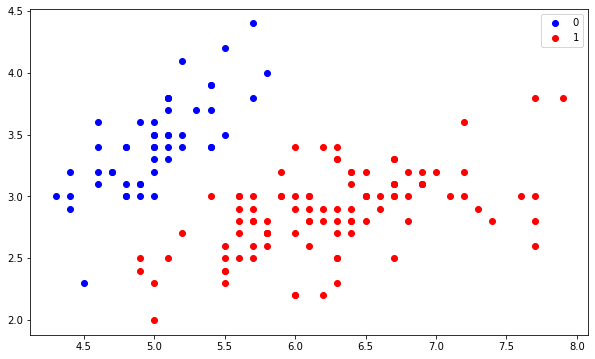

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

#### It seems that it can be differentiated using a Decision Boundary, now lets define our class.

In [ ]:
class LogisticRegression:
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate=0.01, num_iterations=5000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __sigmoid_function(self, z):
        # this is our actual sigmoid function which predicts our yp
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, yp, y):
        # this is the loss function which we use to minimize the error of our model
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # this is the function which trains our model.
    def fit(self, X, y):
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        self.W = np.zeros(X.shape[1])
        
        # this for loop runs for the number of iterations provided
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            z = np.dot(X, self.W)
            
            # this is where we predict the values of Y based on W and Xi
            yp = self.__sigmoid_function(z)
            
            # this is where the gradient is calculated form the error generated by our model
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            self.W -= self.learning_rate * gradient
            
            # this is our new W * Xi
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            # this is where the loss is calculated
            loss = self.__loss(yp, y)
            
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, X):
        # this is the final prediction that is generated based on the values learned.
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
    def predict(self, X):
        return self.predict_prob(X).round()

#### Let us try creating a class of it, we will give Learning rate as 0.1  and number of iterations as 300000

In [ ]:
model = LogisticRegression(learning_rate=0.1, num_iterations=3000)

#### Now we will try to train our model.

In [ ]:
%%time
model.fit(X, y)

Wall time: 206 ms


#### Lets us see how well our prediction works

In [ ]:
preds = model.predict(X)
(preds == y).mean()

0.9933333333333333

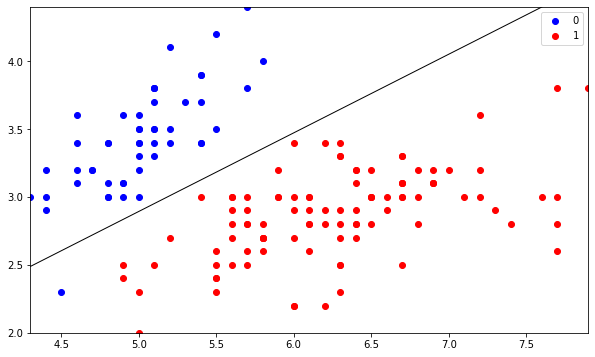

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.99      1.00      1.00       100

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



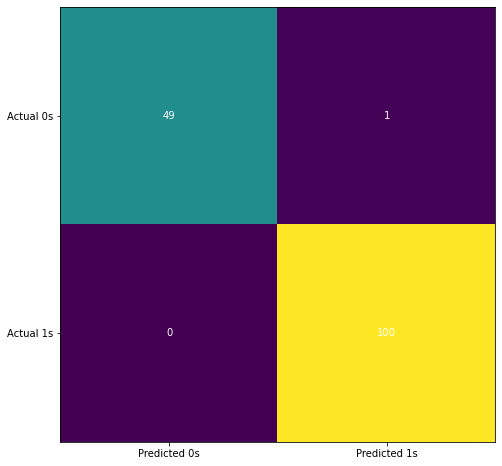

In [ ]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

# Implementing Logistic Regression from Scikit-Learn

#### Either you can choose to do all those coding yourself, or what you can do is just import a class form a phenominal library of python called Scikit-Learn, and use it's pre implemented Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(random_state=0)

#### It also has the same method as fit to train the model

In [ ]:
model.fit(X, y)

LogisticRegression(random_state=0)

#### Let us try to predict, and check the value of its prediction.

In [ ]:
model.predict_proba(X)

array([[8.92720238e-01, 1.07279762e-01],
       [7.71046348e-01, 2.28953652e-01],
       [9.25861792e-01, 7.41382077e-02],
       [9.27383226e-01, 7.26167745e-02],
       [9.41260955e-01, 5.87390446e-02],
       [9.14366510e-01, 8.56334901e-02],
       [9.70588854e-01, 2.94111457e-02],
       [8.94844544e-01, 1.05155456e-01],
       [9.30340069e-01, 6.96599310e-02],
       [8.22106028e-01, 1.77893972e-01],
       [8.50082658e-01, 1.49917342e-01],
       [9.43687032e-01, 5.63129680e-02],
       [8.25355057e-01, 1.74644943e-01],
       [9.62572636e-01, 3.74273639e-02],
       [7.90722967e-01, 2.09277033e-01],
       [9.49498438e-01, 5.05015620e-02],
       [9.14366510e-01, 8.56334901e-02],
       [8.92720238e-01, 1.07279762e-01],
       [7.37925296e-01, 2.62074704e-01],
       [9.55561442e-01, 4.44385583e-02],
       [6.86948409e-01, 3.13051591e-01],
       [9.40011474e-01, 5.99885260e-02],
       [9.84162879e-01, 1.58371212e-02],
       [8.15466254e-01, 1.84533746e-01],
       [9.436870

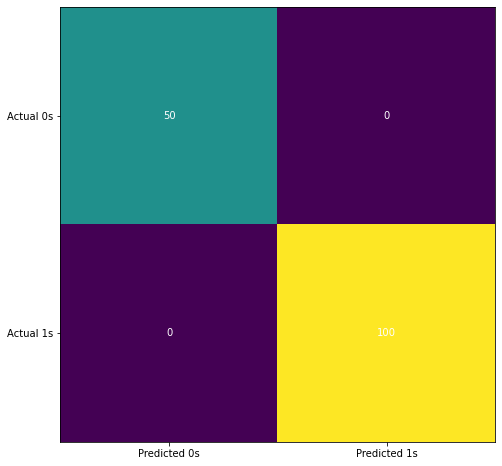

In [ ]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       100

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

